In [107]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [108]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [109]:
df = pd.read_csv("../Python/Output/FFT_4_17.txt", sep='\t')
df.head()

SinSource NoiseType  Noise Signal  Order  Freq       Test  Uncertainty Mean  \
0  IndexSin  Gaussian    0.1    Sin      4     1    Forward             0.400   
1  IndexSin  Gaussian    0.1    Sin      4     1    Reverse             0.025   
2  IndexSin  Gaussian    0.1    Sin      4     1  Roundtrip             0.100   
3  IndexSin  Gaussian    0.1    Sin      4     2    Forward             0.400   
4  IndexSin  Gaussian    0.1    Sin      4     2    Reverse             0.025   

   Uncertainty Deviation  Uncertainty Minimum  ...       1.2       1.4  \
0                    0.0                0.400  ...  0.064516  0.032258   
1                    0.0                0.025  ...  0.093750  0.031250   
2                    0.0                0.100  ...  0.000000  0.000000   
3                    0.0                0.400  ...  0.031250  0.031250   
4                    0.0                0.025  ...  0.031250  0.062500   

        1.6      1.8       2.0       2.2  2.4      2.6  2.8  3.0  
0  0.064516  0.00000  0.032258  0.032258  0.0  0.00000  0.0  0.0  
1  0.000000  0.03125  0.000000  0.000000  0.0  0.03125  0.0  0.0  
2  0.000000  0.00000  0.000000  0.000000  0.0  0.00000  0.0  0.0  
3  0.000000  0.06250  0.000000  0.000000  0.0  0.00000  0.0  0.0  
4  0.031250  0.00000  0.000000  0.000000  0.0  0.00000  0.0  0.0  

[5 rows x 46 columns]

In [110]:
df.columns

Index(['SinSource', 'NoiseType', 'Noise', 'Signal', 'Order', 'Freq', 'Test',
       'Uncertainty Mean', 'Uncertainty Deviation', 'Uncertainty Minimum',
       'Uncertainty Maximum', 'Error Mean', 'Error Deviation', 'Error Minimum',
       'Error Maximum', '-3.0', '-2.8', '-2.6', '-2.4', '-2.2', '-2.0', '-1.8',
       '-1.6', '-1.4', '-1.2', '-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0.0',
       '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0',
       '2.2', '2.4', '2.6', '2.8', '3.0'],
      dtype='object')

# Special Order

In [111]:
ORDER=17

# vs Noise vs Order

In [112]:
def PlotSurface(test, value, noiseType, sinSource, signal, freq=0, logz=False):
    dfOrderVsNoise = df[(df['Noise']!=0) & (df['NoiseType']==noiseType) & (df['Order']>=6) & 
                        (df['SinSource']==sinSource) & (df['Signal']==signal) & (df['Test']==test) & (df['Freq']==freq)]\
                .pivot(index='Noise', columns='Order', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values if logz else dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, 135) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=plt.cm.spring if value == 'Uncertainty Mean' else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal in ['Linear', 'Slope'] else f'{signal} freq={freq}'
    ax.set_title(f'{sinSource} {signalName} {test} {value}')
    
    ax.set_xlabel('Order')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 2)]
    ax.set_xticks(sXTick, [f'{x}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if value == 'Error Deviation':
        pass
        # TODO: adjust color range 
        # ax.set_zlim([0, 2])
        # cb.set_clim([0, 2])
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])

## Sin/Cos

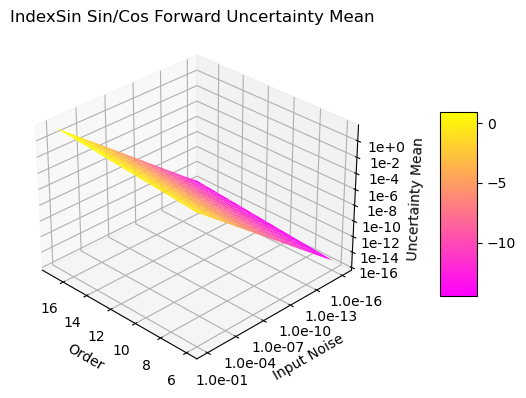

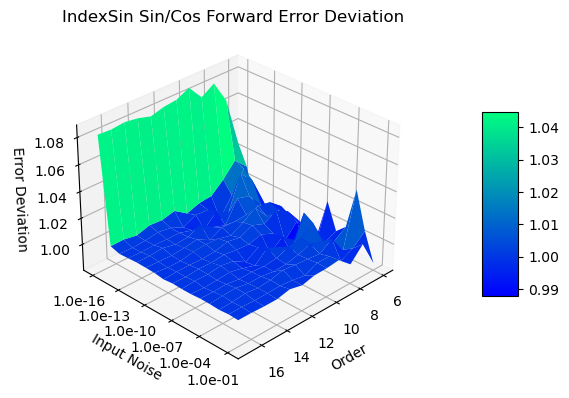

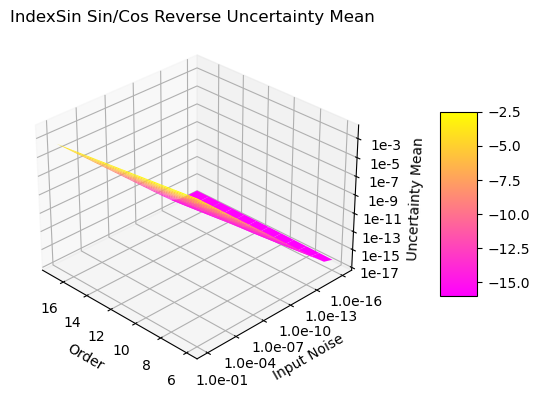

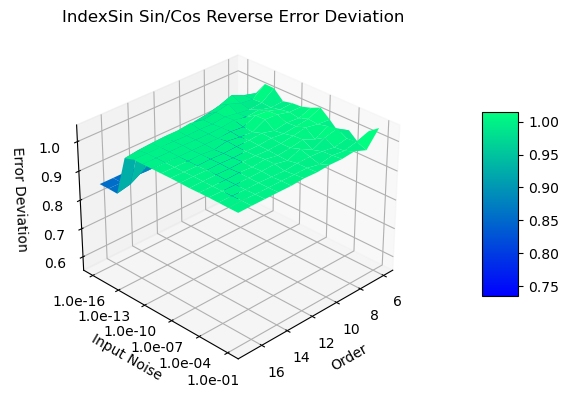

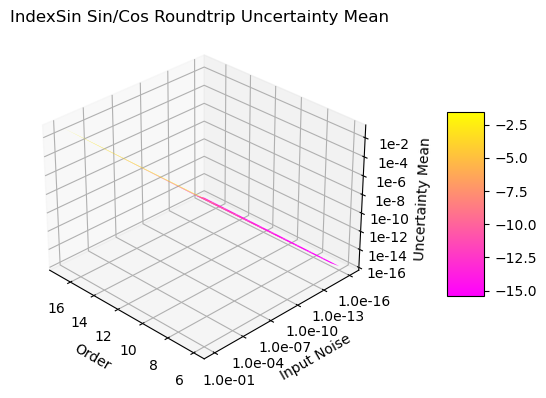

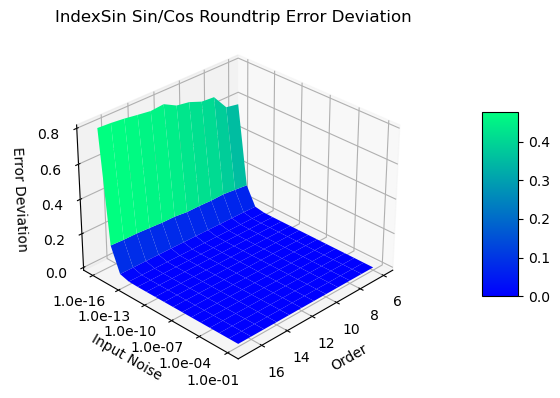

In [113]:
for test in ['Forward', 'Reverse', 'Roundtrip']:
    for value in ['Uncertainty Mean', 'Error Deviation']:
        PlotSurface(test, value, 'Gaussian', 'IndexSin', 'Aggr', logz=(value=='Uncertainty Mean'))

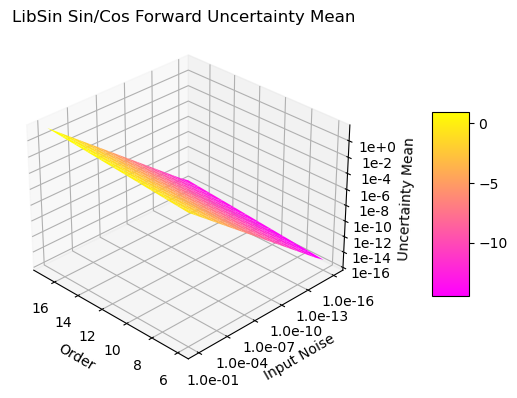

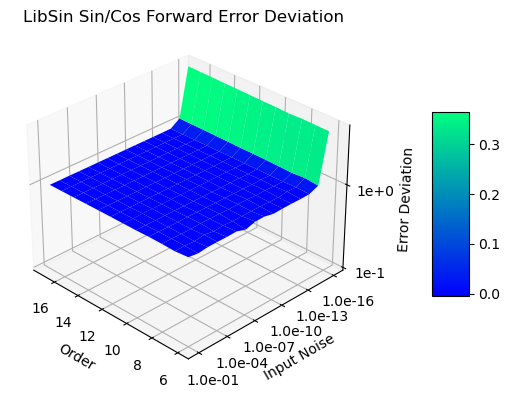

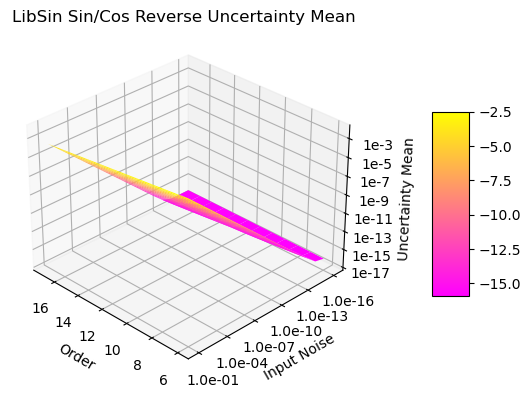

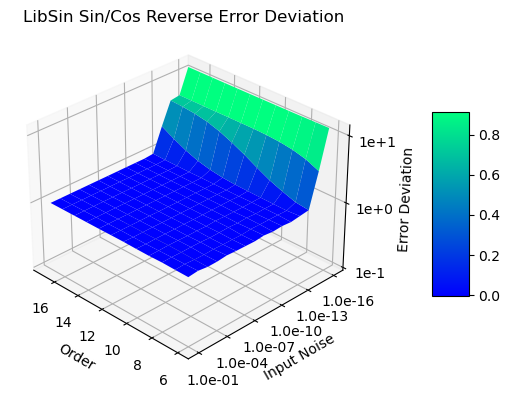

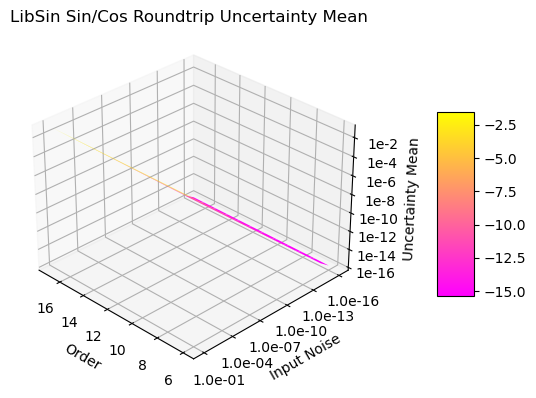

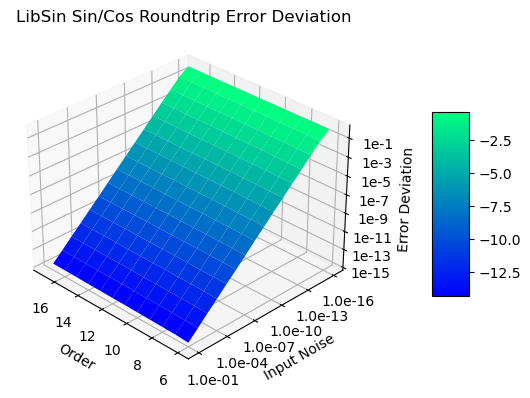

In [114]:
for test in ['Forward', 'Reverse', 'Roundtrip']:
    for value in ['Uncertainty Mean', 'Error Deviation']:
        PlotSurface(test, value, 'Gaussian', 'LibSin', 'Aggr', logz=True)

## Linear

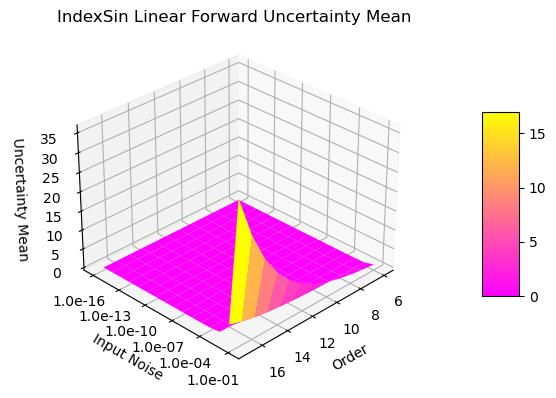

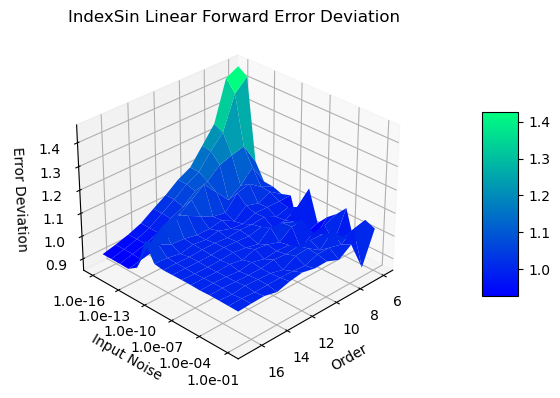

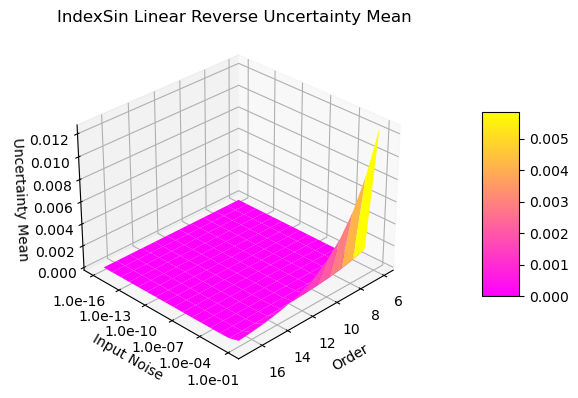

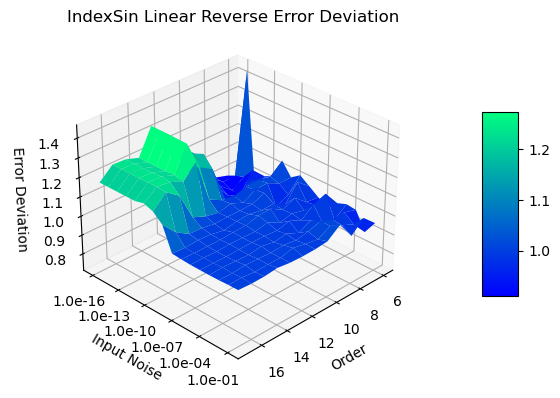

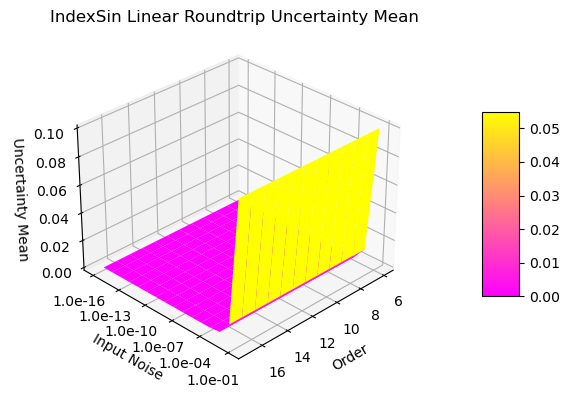

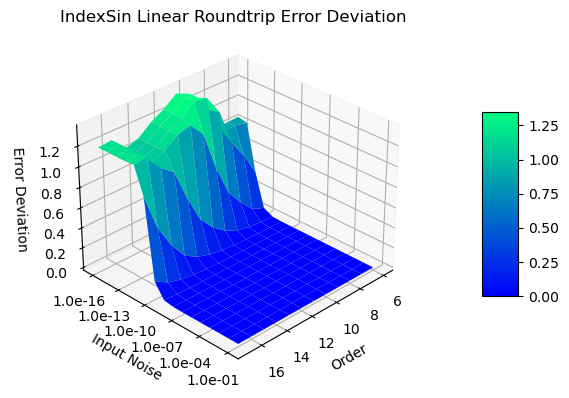

In [115]:
for test in ['Forward', 'Reverse', 'Roundtrip']:
    for value in ['Uncertainty Mean', 'Error Deviation']:
        PlotSurface(test, value, 'Gaussian', 'IndexSin', 'Linear')

## LibSin Linear

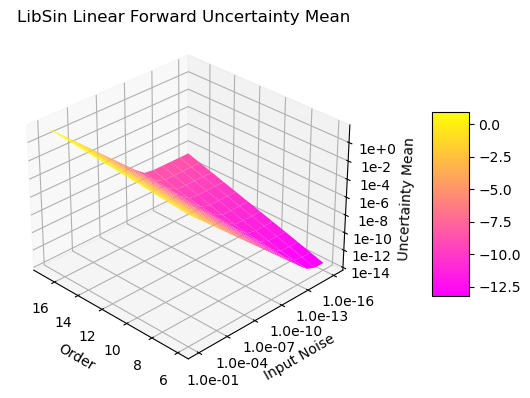

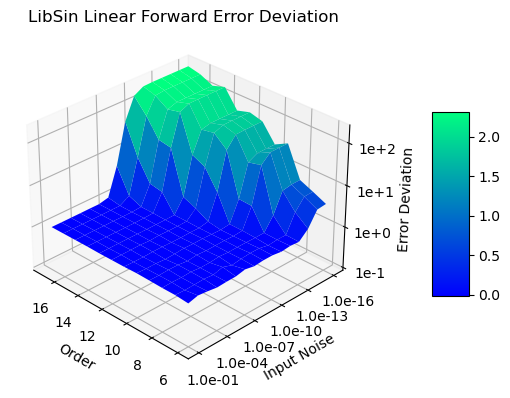

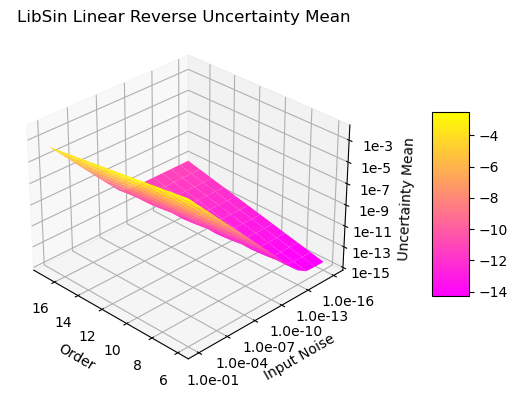

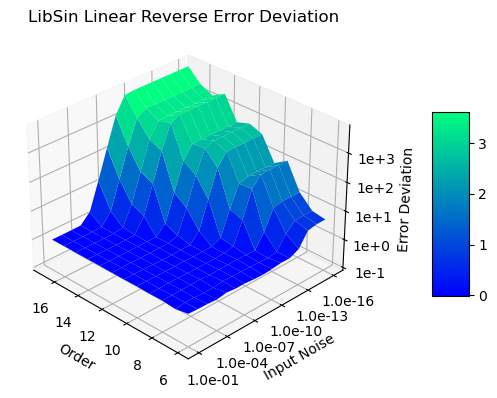

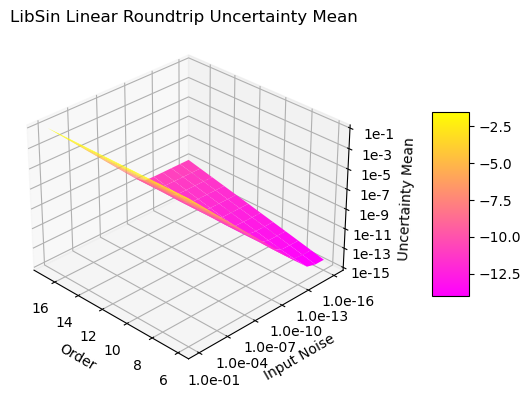

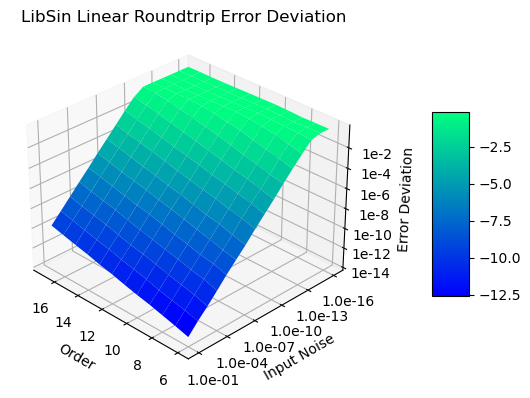

In [116]:
for test in ['Forward', 'Reverse', 'Roundtrip']:
    for value in ['Uncertainty Mean', 'Error Deviation']:
        PlotSurface(test, value, 'Gaussian', 'LibSin', 'Linear', logz=True)

# Histogram

In [117]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

-3.0  -2.8  -2.6     -2.4      -2.2     -2.0      -1.8     -1.6      -1.4  \
0   0.0   0.0   0.0  0.00000  0.032258  0.00000  0.032258  0.00000  0.032258   
1   0.0   0.0   0.0  0.03125  0.000000  0.00000  0.000000  0.06250  0.000000   
2   0.0   0.0   0.0  0.00000  0.000000  0.00000  0.000000  0.00000  0.000000   
3   0.0   0.0   0.0  0.03125  0.000000  0.03125  0.000000  0.00000  0.031250   
4   0.0   0.0   0.0  0.00000  0.000000  0.00000  0.062500  0.03125  0.093750   

      -1.2  ...       1.2       1.4       1.6      1.8       2.0       2.2  \
0  0.00000  ...  0.064516  0.032258  0.064516  0.00000  0.032258  0.032258   
1  0.00000  ...  0.093750  0.031250  0.000000  0.03125  0.000000  0.000000   
2  0.00000  ...  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
3  0.12500  ...  0.031250  0.031250  0.000000  0.06250  0.000000  0.000000   
4  0.03125  ...  0.031250  0.062500  0.031250  0.00000  0.000000  0.000000   

   2.4      2.6  2.8  3.0  
0  0.0  0.00000  0.0  0.0  
1  0.0  0.03125  0.0  0.0  
2  0.0  0.00000  0.0  0.0  
3  0.0  0.00000  0.0  0.0  
4  0.0  0.00000  0.0  0.0  

[5 rows x 31 columns]

## Sin/Cos

### Sin at different freq

In [118]:
def PlotErrorDev(sinSource, noiseType='Gaussian', noise=0, signal='Sin', test='Forward'):
    dfPlot = df[(df['SinSource']==sinSource) & (df['NoiseType']==noiseType) & (df['Noise']==noise) & 
                (df['Signal']==signal) & (df['Test']=='Forward')]
    fig, ax = plt.subplots()
    ax.set_title(f'{signal} {test}')
    ax.set_xlabel('Freq')
    ax.set_ylabel('Error Uncertainty')
    plt.grid(True)
    for order in range(6, ORDER + 1):
        ax.plot(dfPlot[dfPlot['Order']==order]['Freq'], dfPlot[dfPlot['Order']==order]['Error Deviation'], label=f'{order}')
    ax.legend(bbox_to_anchor=(1.0, 1.0))

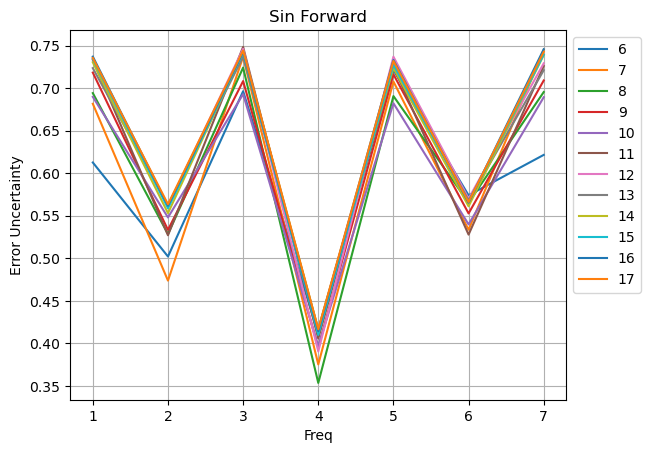

In [119]:
PlotErrorDev('IndexSin')

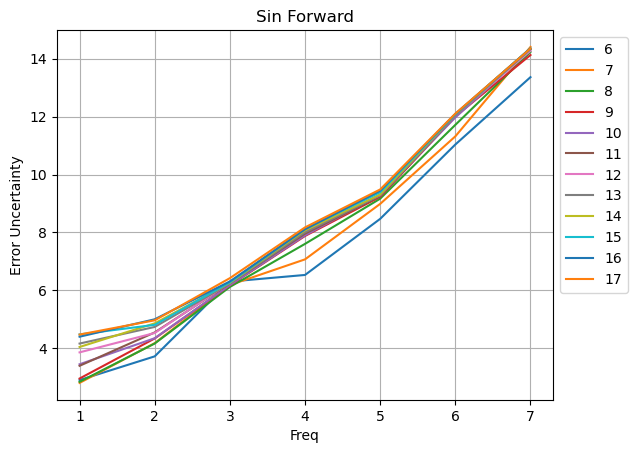

In [120]:
PlotErrorDev('LibSin')

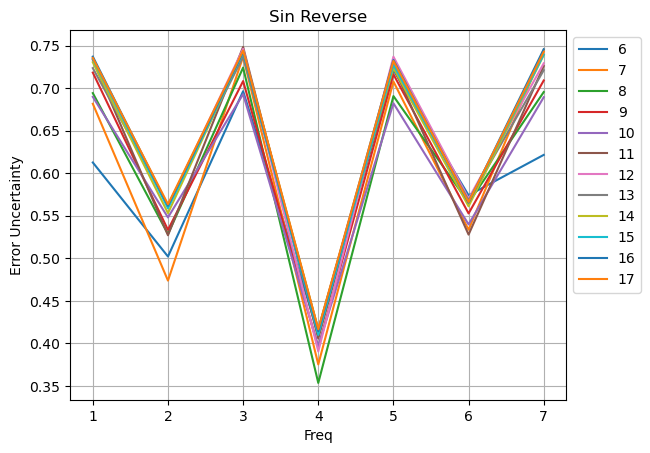

In [121]:
PlotErrorDev('IndexSin', test='Reverse')

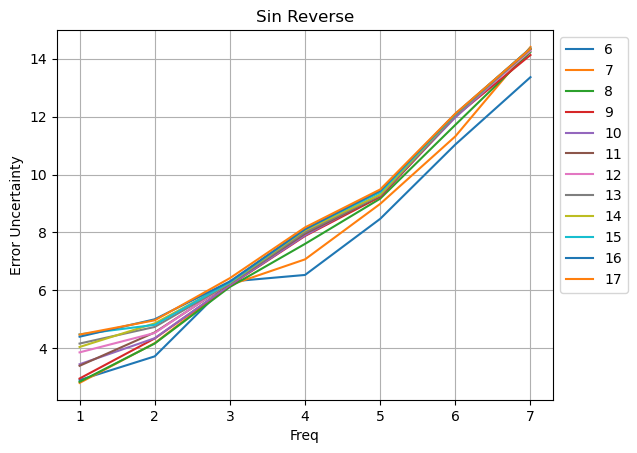

In [122]:
PlotErrorDev('LibSin', test='Reverse')

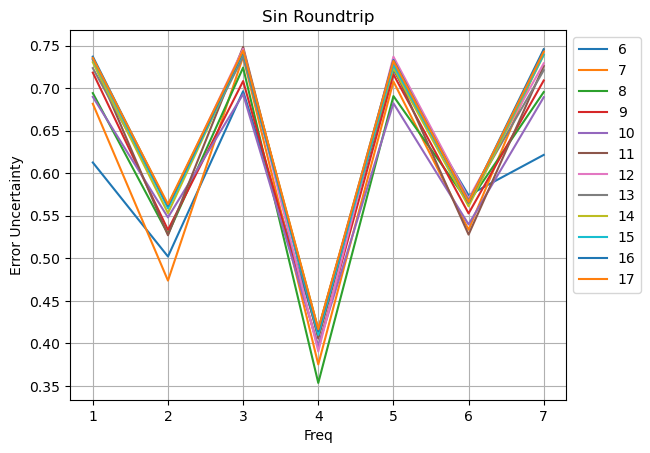

In [123]:
PlotErrorDev('IndexSin', test='Roundtrip')

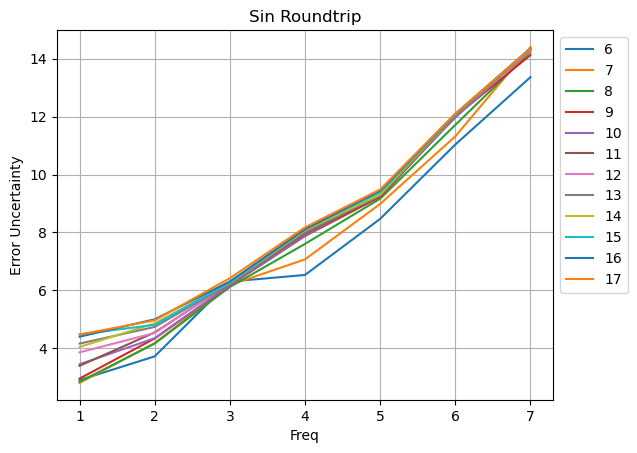

In [124]:
PlotErrorDev('LibSin', test='Roundtrip')

In [125]:
def PlotManyFreq(order, noise, sinSource, signal, test, sFreq=[1,2,3,4,5,6]):
    df['algo'] = df['NoiseType'] + ": "+ df['Freq'].astype(str)

    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['Signal']==signal) & (df['Test']==test) & 
                 (df['SinSource']==sinSource) & (df['Freq'].isin(sFreq))].set_index('algo')
    dfHisto[sHisto].T.plot( style=['-']*3 + ['--']*3 + ['x']*3 + ['+']*3, 
                            title=f'{signal} {test} order={order} freq={sFreq} noise={noise}' )

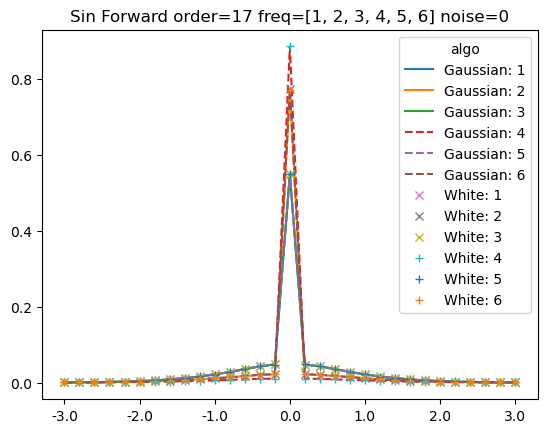

In [126]:
PlotManyFreq(ORDER, 0, 'IndexSin', 'Sin', 'Forward')

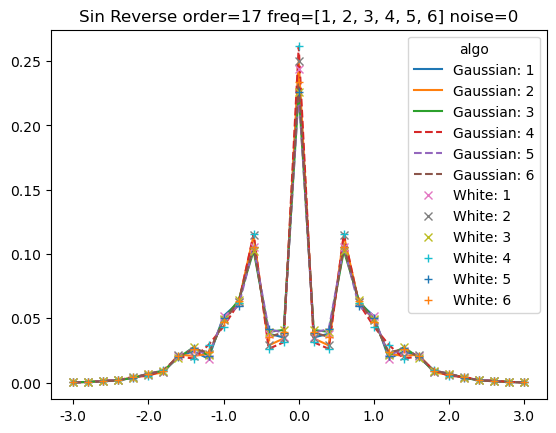

In [127]:
PlotManyFreq(ORDER, 0, 'IndexSin', 'Sin', 'Reverse')

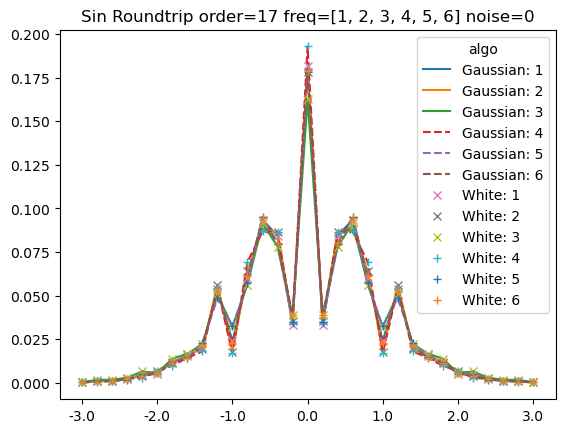

In [128]:
PlotManyFreq(ORDER, 0, 'IndexSin', 'Sin', 'Roundtrip')

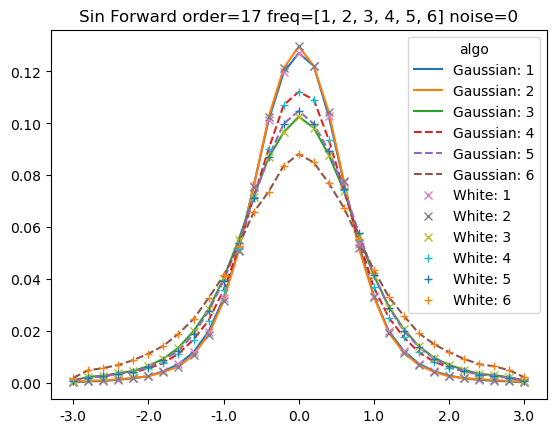

In [129]:
PlotManyFreq(ORDER, 0, 'LibSin', 'Sin', 'Forward')

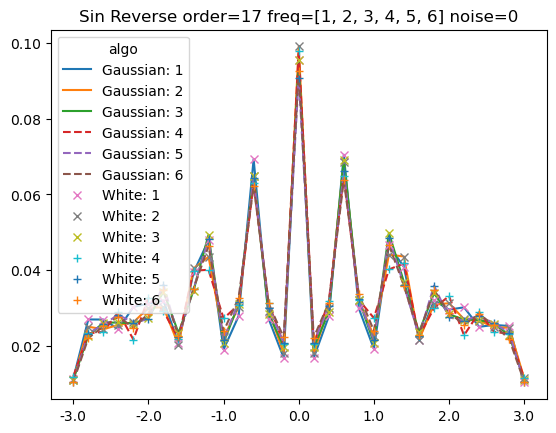

In [130]:
PlotManyFreq(ORDER, 0, 'LibSin', 'Sin', 'Reverse')

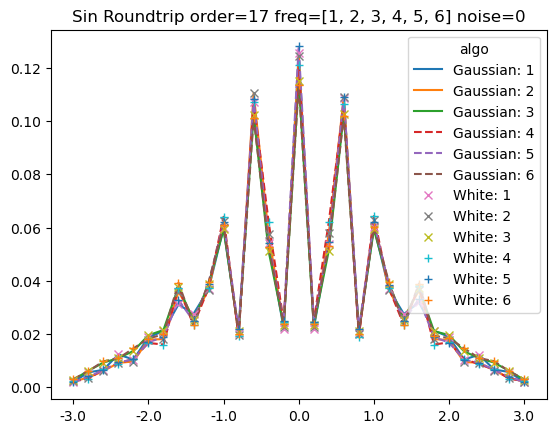

In [131]:
PlotManyFreq(ORDER, 0, 'LibSin', 'Sin', 'Roundtrip')

### Sin vs Cos

In [132]:
def PlotSinCos(order, noise, freq, sinSource, test):
    df['algo'] = df['NoiseType'] + ": "+ df['Signal']

    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['Freq']== freq) & (df['Test']==test) & 
                 (df['SinSource']==sinSource) & (df['Signal'].isin(['Sin', 'Cos']))].set_index('algo')
    dfHisto[sHisto].T.plot(style=['-', 'x', '--', '+', '--', '--', '-.', '-.', '-.'], logy=True, 
                       title=f'Sin/Cos {test} order={order} freq={freq} noise={noise}')

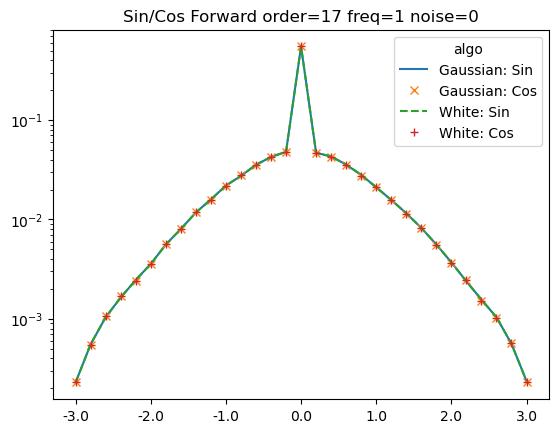

In [133]:
PlotSinCos(ORDER, 0, 1, 'IndexSin', 'Forward')

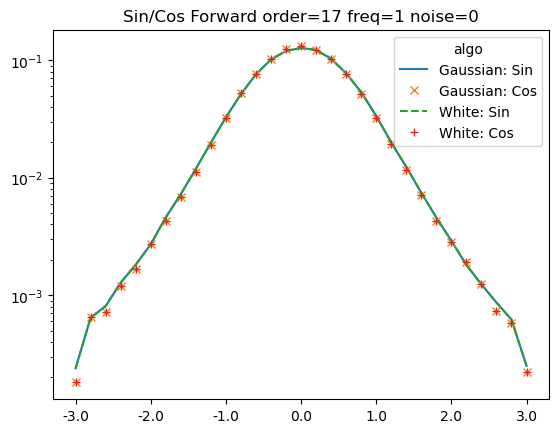

In [134]:
PlotSinCos(ORDER, 0, 1, 'LibSin', 'Forward')

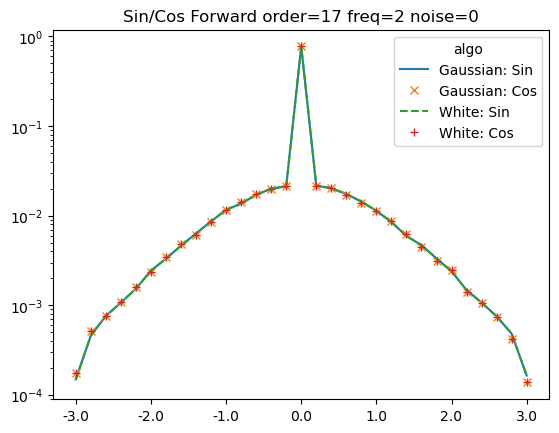

In [135]:
PlotSinCos(ORDER, 0, 2, 'IndexSin', 'Forward')

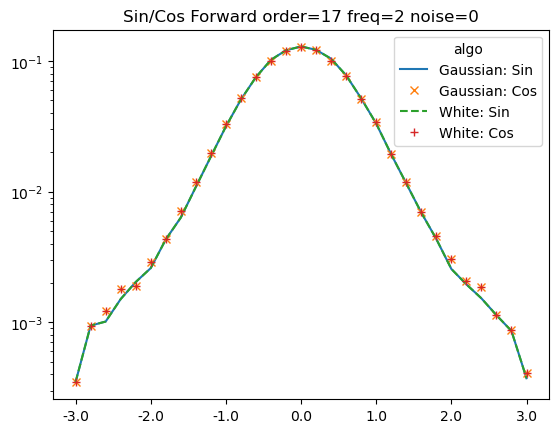

In [136]:
PlotSinCos(ORDER, 0, 2, 'LibSin', 'Forward')

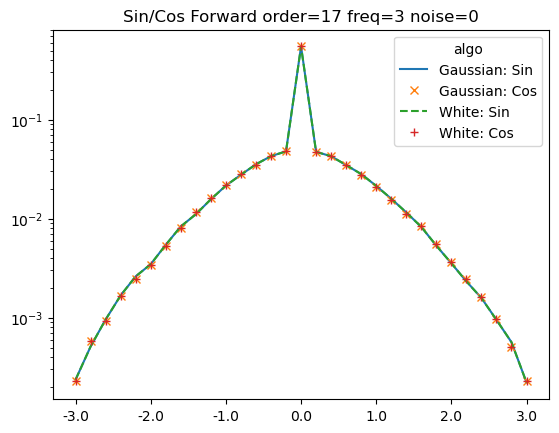

In [137]:
PlotSinCos(ORDER, 0, 3, 'IndexSin', 'Forward')

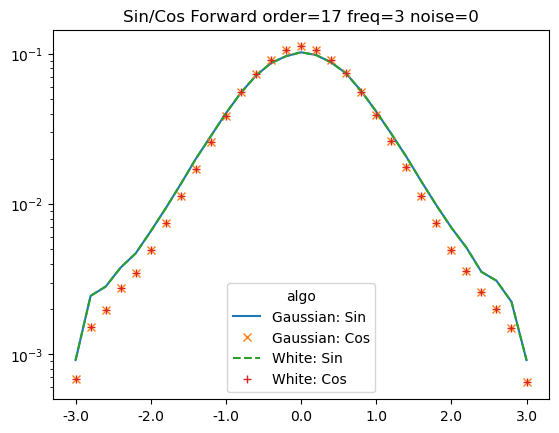

In [138]:
PlotSinCos(ORDER, 0, 3, 'LibSin', 'Forward')

### Aggr vs Noise

In [139]:
def PlotHistogram( order, noise, sinSource, signal, freq=0, ylim=[] ):
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    df['legend'] = df['Test'] + " " + df['NoiseType']

    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['SinSource']==sinSource) & (df['Signal']==signal) & (df['Freq']==freq)]\
                .set_index('legend')
    ax = dfHisto[sHisto].T.plot(style=['m-', 'g-', 'b-', 'mx', 'gx', 'bx'],
                           title=f'{signalName} order={order} noise={noise} using {sinSource}')
    ax.set_xlabel('Normalized Error')
    ax.set_ylabel('Normalized Histogram Count')
    if ylim:
        ax.set_ylim(ylim)

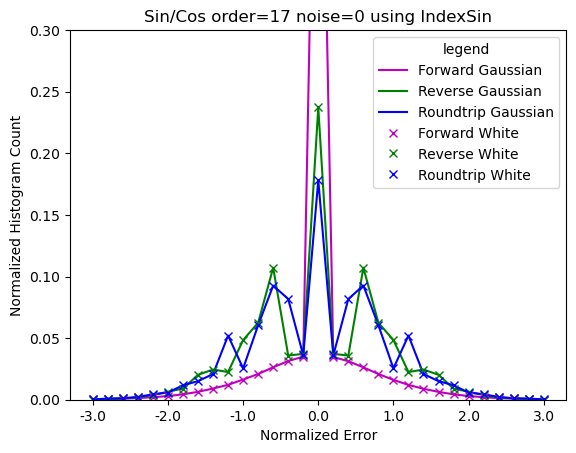

In [140]:
PlotHistogram(ORDER, 0, 'IndexSin', 'Aggr', ylim=[0, 0.3])

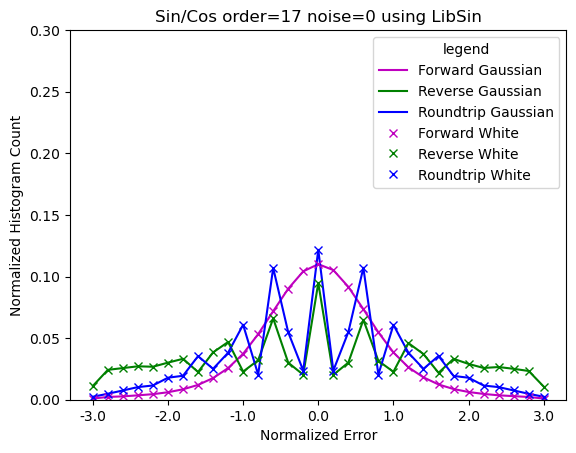

In [141]:
PlotHistogram(ORDER, 0, 'LibSin', 'Aggr', ylim=[0, 0.3])

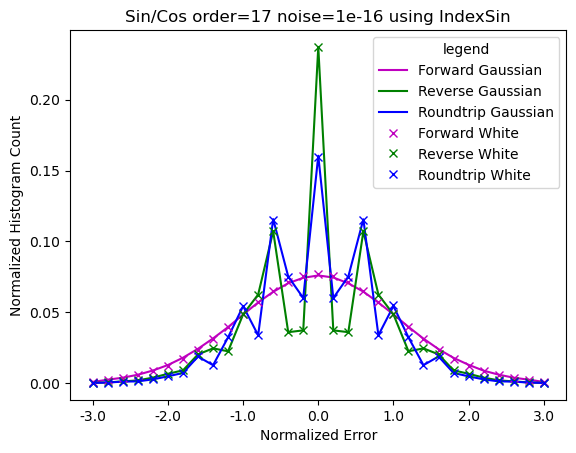

In [142]:
PlotHistogram(ORDER, 1e-16, 'IndexSin', 'Aggr')

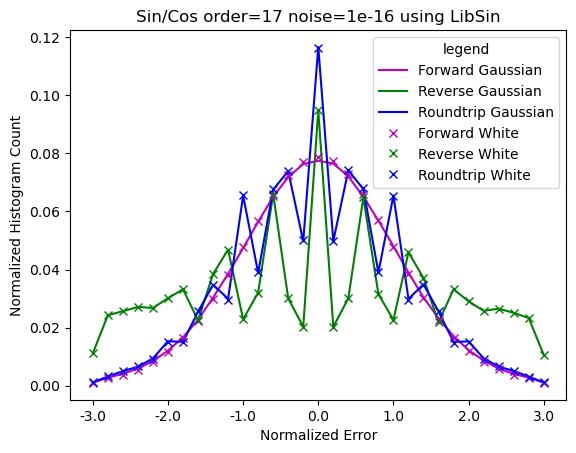

In [143]:
PlotHistogram(ORDER, 1e-16, 'LibSin', 'Aggr')

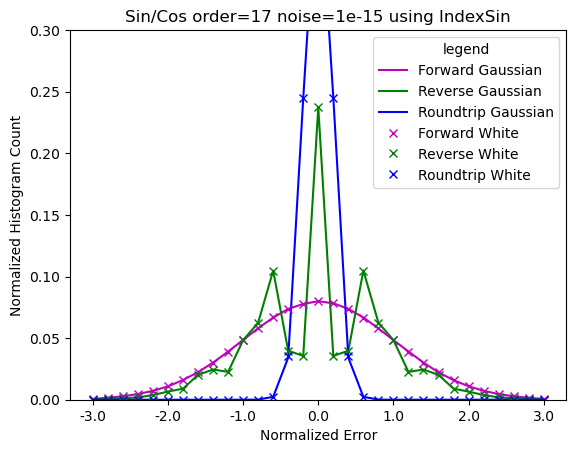

In [144]:
PlotHistogram(ORDER, 1e-15, 'IndexSin', 'Aggr', ylim=[0, 0.3])

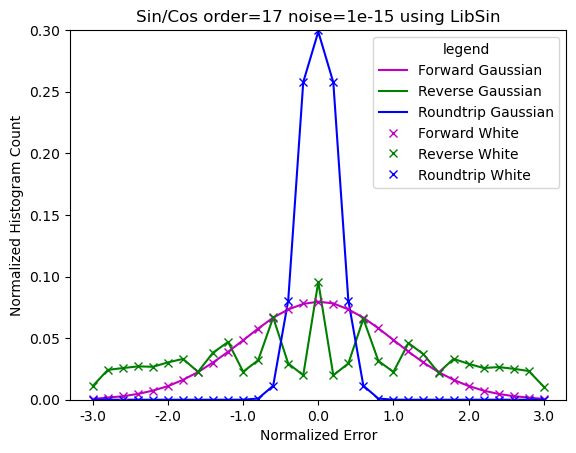

In [145]:
PlotHistogram(ORDER, 1e-15, 'LibSin', 'Aggr', ylim=[0, 0.3])

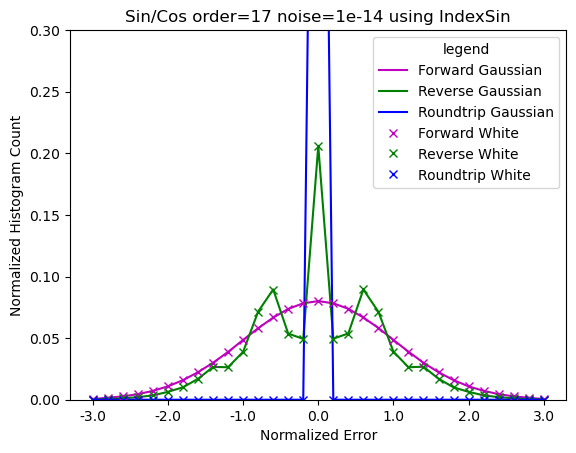

In [146]:
PlotHistogram(ORDER, 1e-14, 'IndexSin', 'Aggr', ylim=[0, 0.3])

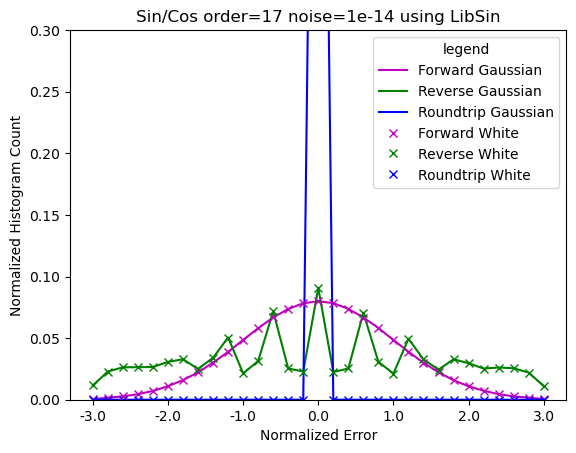

In [147]:
PlotHistogram(ORDER, 1e-14, 'LibSin', 'Aggr', ylim=[0, 0.3])

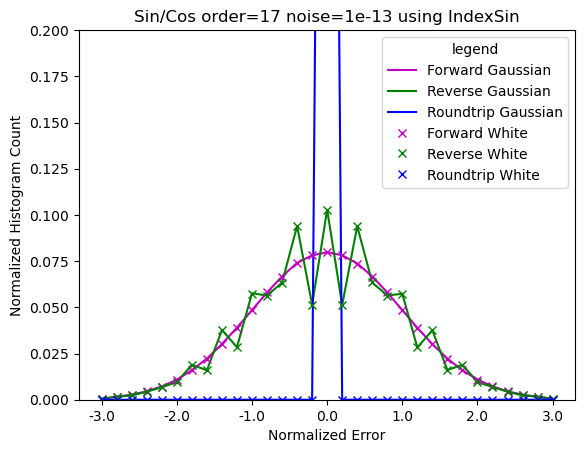

In [148]:
PlotHistogram(ORDER, 1e-13, 'IndexSin', 'Aggr', ylim=[0, 0.2])

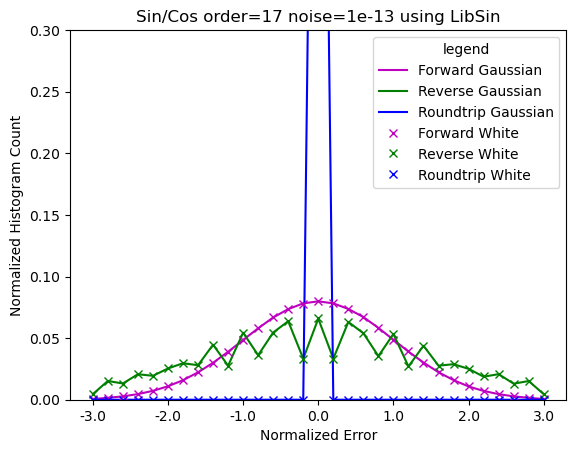

In [149]:
PlotHistogram(ORDER, 1e-13, 'LibSin', 'Aggr', ylim=[0, 0.3])

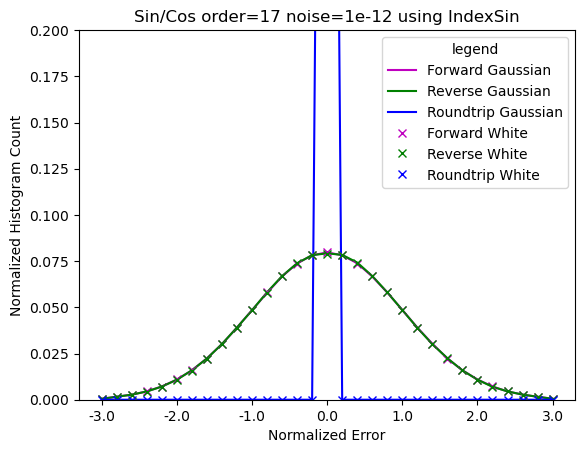

In [150]:
PlotHistogram(ORDER, 1e-12, 'IndexSin', 'Aggr', ylim=[0, 0.2])

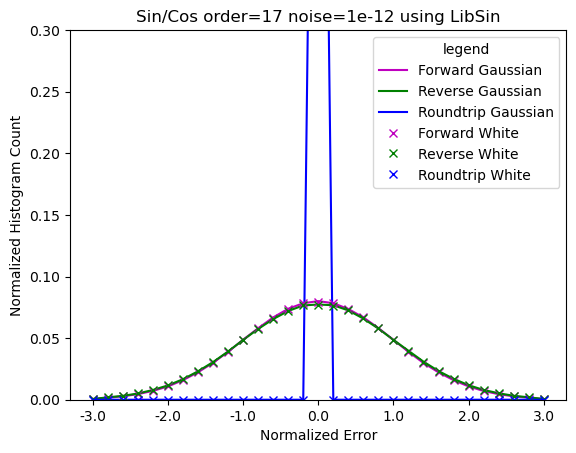

In [151]:
PlotHistogram(ORDER, 1e-12, 'LibSin', 'Aggr', ylim=[0, 0.3])

### Linear vs Noise

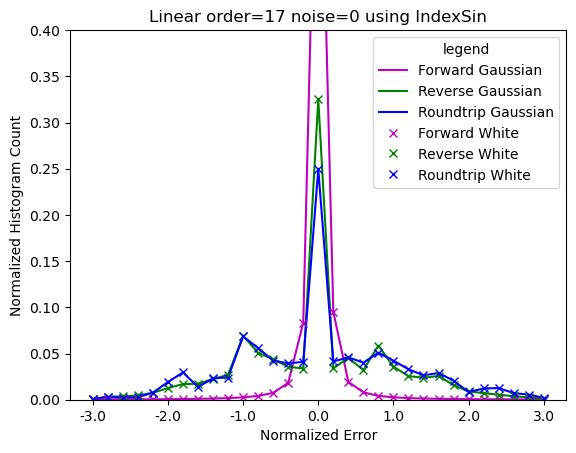

In [152]:
PlotHistogram(ORDER, 0, 'IndexSin', 'Linear', ylim=[0, 0.4])

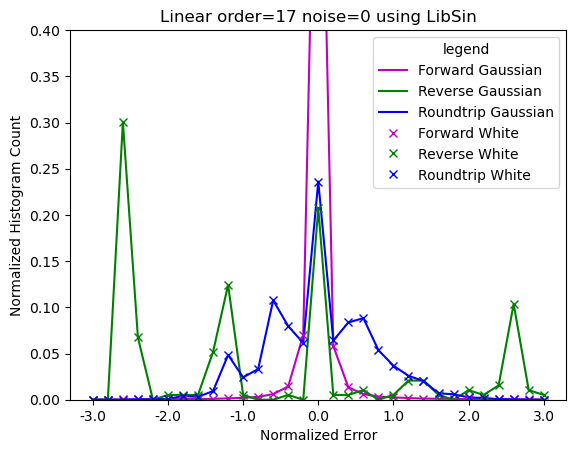

In [153]:
PlotHistogram(ORDER, 0, 'LibSin', 'Linear', ylim=[0, 0.4])

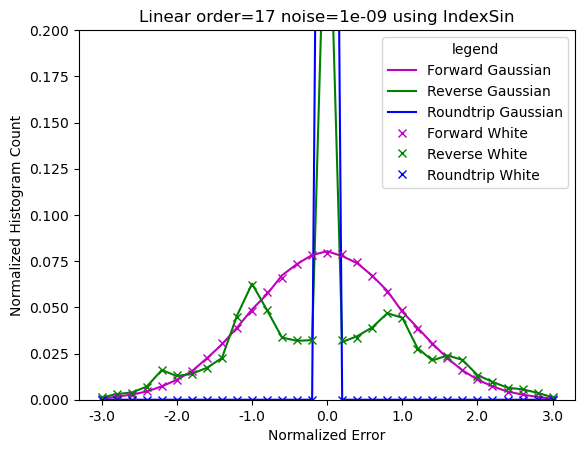

In [154]:
PlotHistogram(ORDER, 1e-9, 'IndexSin', 'Linear', ylim=[0, 0.2])

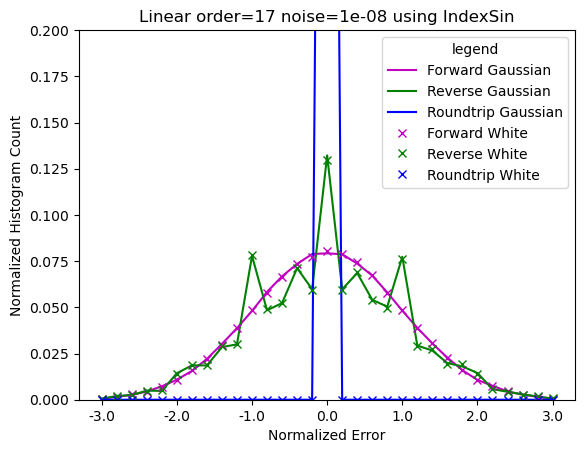

In [155]:
PlotHistogram(ORDER, 1e-8, 'IndexSin', 'Linear', ylim=[0, 0.2])

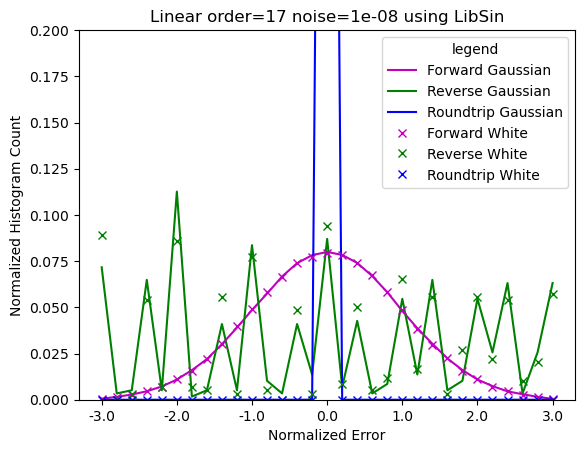

In [156]:
PlotHistogram(ORDER, 1e-8, 'LibSin', 'Linear', ylim=[0, 0.2])

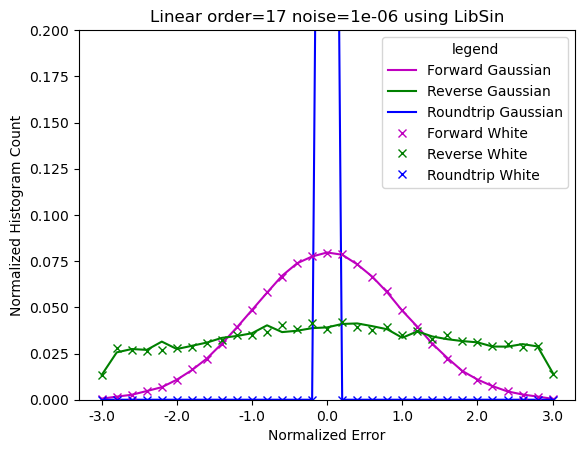

In [157]:
PlotHistogram(ORDER, 1e-6, 'LibSin', 'Linear', ylim=[0, 0.2])

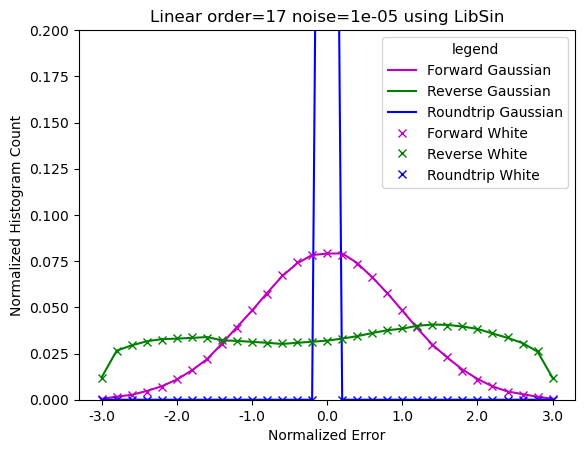

In [158]:
PlotHistogram(ORDER, 1e-5, 'LibSin', 'Linear', ylim=[0, 0.2])

# vs Order

In [159]:
def PlotVsOrder( sinSource, signal, freq=0, sTest=('Forward', 'Reverse', 'Roundtrip'), 
                 sValue=('Error Deviation', 'Uncertainty Mean'), 
                 sStyle=('-', '--'), sLogy=(False, True), sColor = ('r','g','b','y','c','r'), 
                 noiseType='Gaussian', noise=0 ):
    
    fig, ax = plt.subplots()
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    ax.set_title(f'{signalName} without noise using {sinSource}' if noise==0 else f'{signalName} with {noise:.0e} noise using {sinSource}')
    ax.set_xlabel('Order')
    ax.set_ylabel(sValue[0])
    if sLogy[0]:
        ax.set_yscale('log')
    plt.grid(True)
    
    ax2 = ax.twinx()
    ax2.set_ylabel(sValue[1])
    if sLogy[1]:
        ax2.set_yscale('log')
    
    for test, color in zip(sTest, sColor):
        dfPlot = df[(df['SinSource']==sinSource) & (df['Signal']==signal) & (df['Freq']==freq) & (df['Test']==test) &
                    (df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['Order'], dfPlot[sValue[0]], ''.join([color, sStyle[0]]), label=f'{test} {sValue[0]}')
        ax2.plot(dfPlot['Order'], dfPlot[sValue[1]], ''.join([color, sStyle[1]]), label=f'{test} {sValue[1]}')

    ax.legend(bbox_to_anchor=(1.67, 1.0))
    ax2.legend(bbox_to_anchor=(1.67, 0.3))

## Sin/Cos

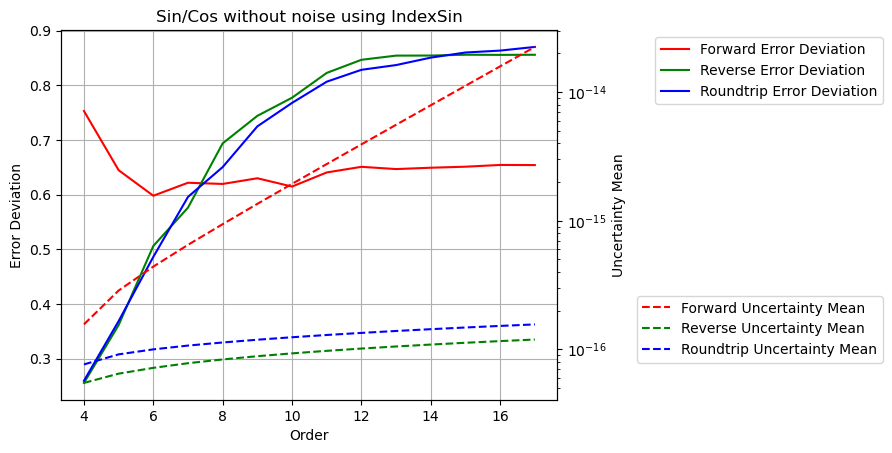

In [160]:
PlotVsOrder('IndexSin', 'Aggr')

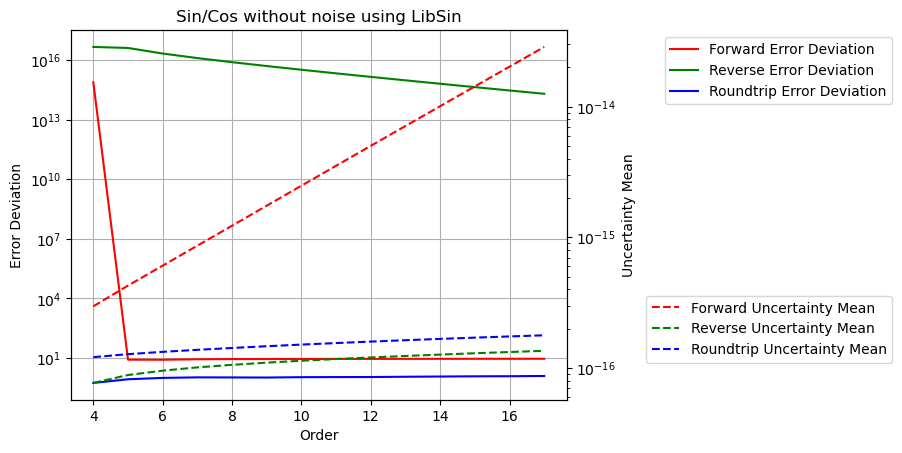

In [161]:
PlotVsOrder('LibSin', 'Aggr', sLogy=(True, True))

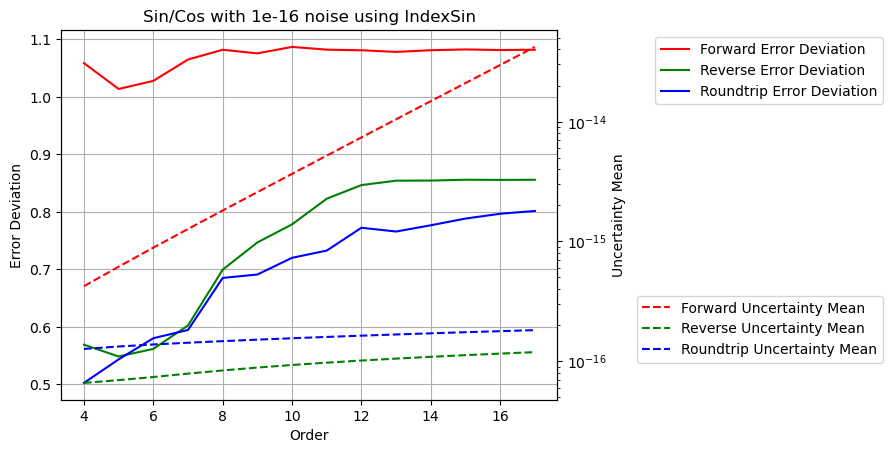

In [162]:
PlotVsOrder('IndexSin', 'Aggr', noise=1e-16)

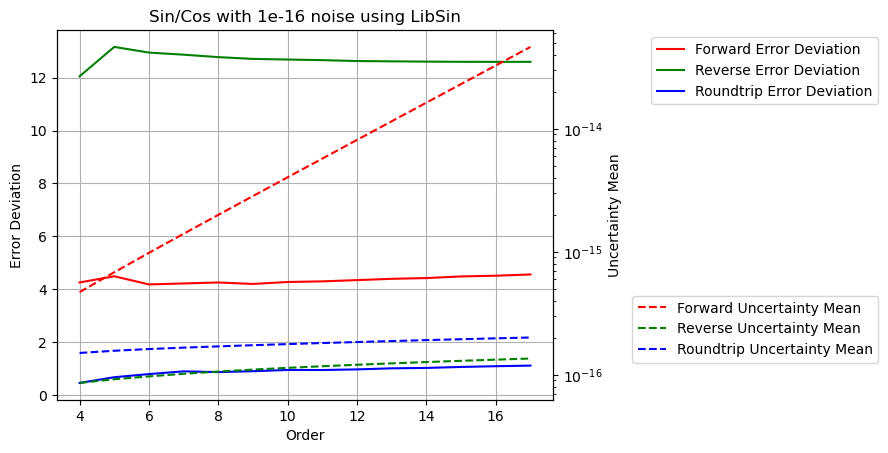

In [163]:
PlotVsOrder('LibSin', 'Aggr', noise=1e-16)

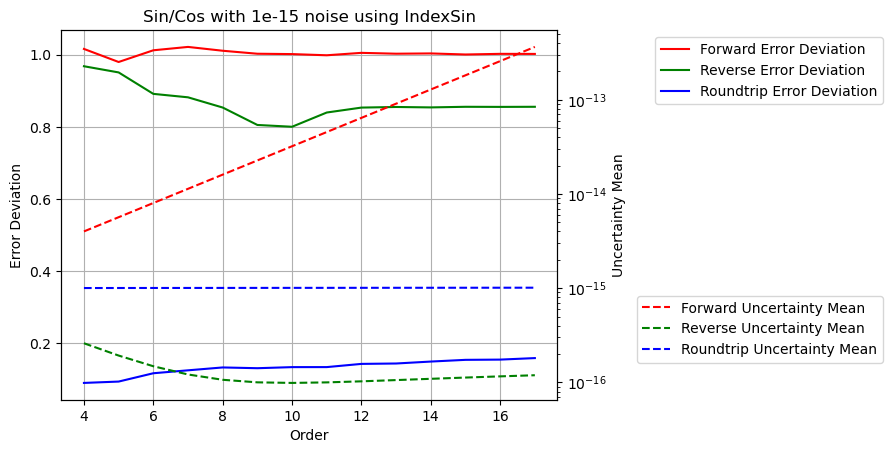

In [164]:
PlotVsOrder('IndexSin', 'Aggr', noise=1e-15)

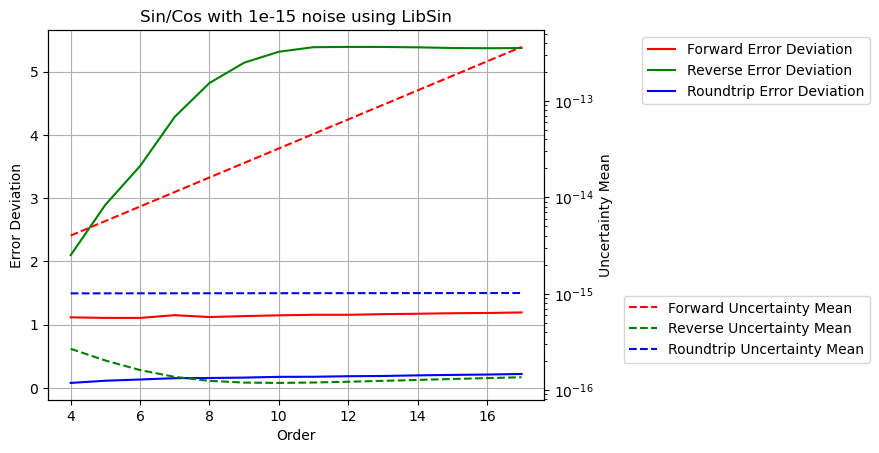

In [165]:
PlotVsOrder('LibSin', 'Aggr', noise=1e-15)

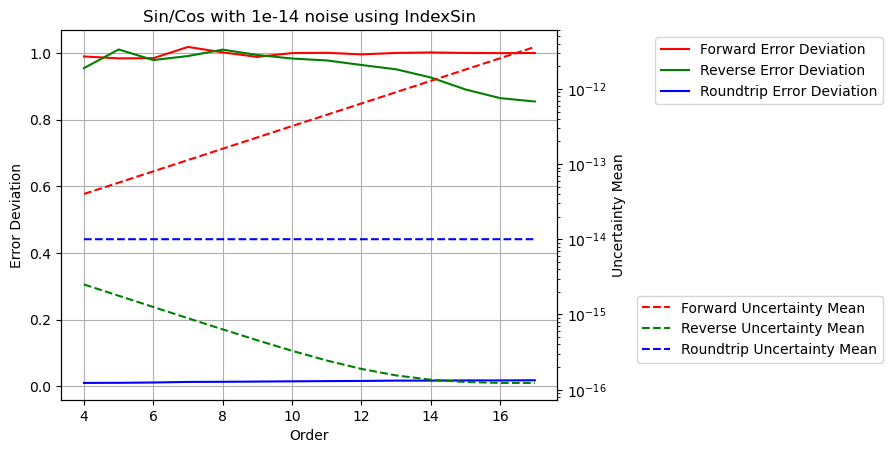

In [166]:
PlotVsOrder('IndexSin', 'Aggr', noise=1e-14)

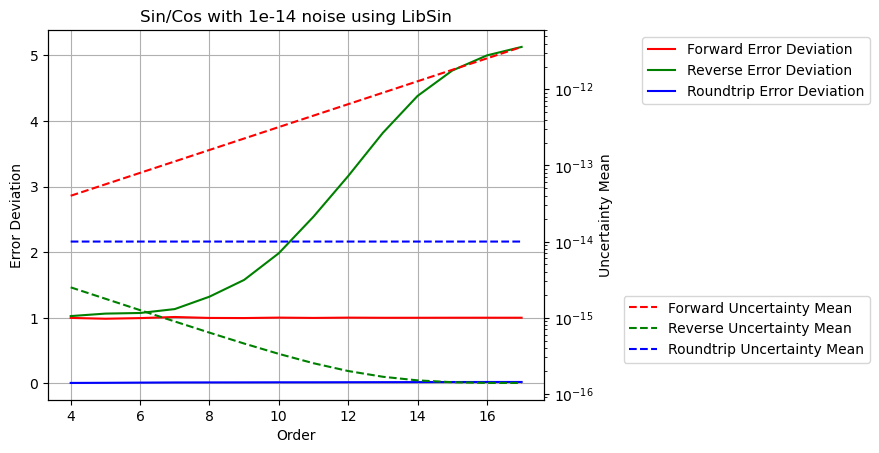

In [167]:
PlotVsOrder('LibSin', 'Aggr', noise=1e-14)

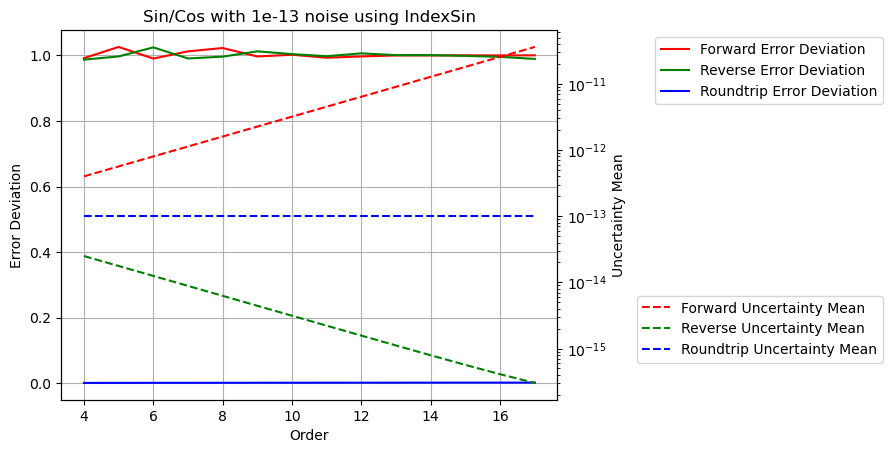

In [168]:
PlotVsOrder('IndexSin', 'Aggr', noise=1e-13)

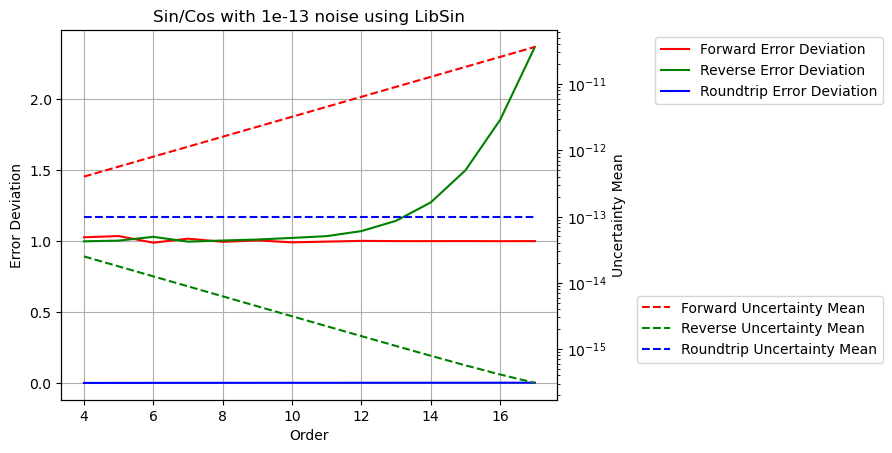

In [169]:
PlotVsOrder('LibSin', 'Aggr', noise=1e-13)

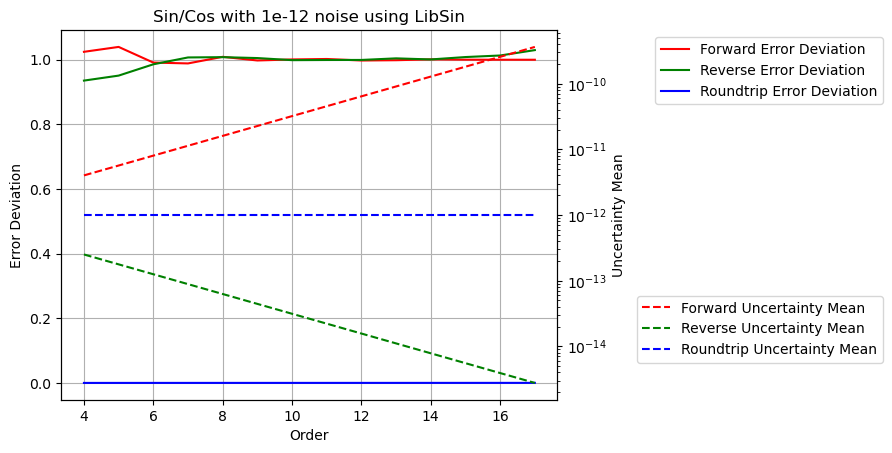

In [170]:
PlotVsOrder('LibSin', 'Aggr', noise=1e-12)

In [171]:
def FitVsOrder( sinSource, value='Uncertainty Mean', signal='Aggr', freq=0, 
                sTest=('Forward', 'Reverse', 'Roundtrip'), 
                sStyle=('x', '--'), sColor = ('r','g','b','y','c','r'), 
                logy=True, noiseType='Gaussian', noise=0 ):
    
    fig, ax = plt.subplots()
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    ax.set_title(f'{signalName} without noise' if noise==0 else f'{signalName} with {noise:.0e} noise using {sinSource}')
    ax.set_xlabel('Order')
    ax.set_ylabel(value)
    if logy:
        ax.set_yscale('log')
    plt.grid(True)
    
    for test, color in zip(sTest, sColor):
        dfPlot = df[(df['SinSource']==sinSource) & (df['Signal']==signal) & (df['Freq']==freq) & (df['Test']==test) &
                    (df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['Order'], dfPlot[value], ''.join([color, sStyle[0]]), label=f'{test} {value}')
        
        sCoef = np.polyfit( dfPlot['Order'], np.log(dfPlot[value]), 1 )
        sFit = np.exp(dfPlot['Order'] * sCoef[0] + sCoef[1])
        ax.plot(dfPlot['Order'], sFit, ''.join([color, sStyle[1]]), label=f'{test} {math.exp(sCoef[0]):.3f}')
        
    ax.legend(bbox_to_anchor=(1.67, 1.0))


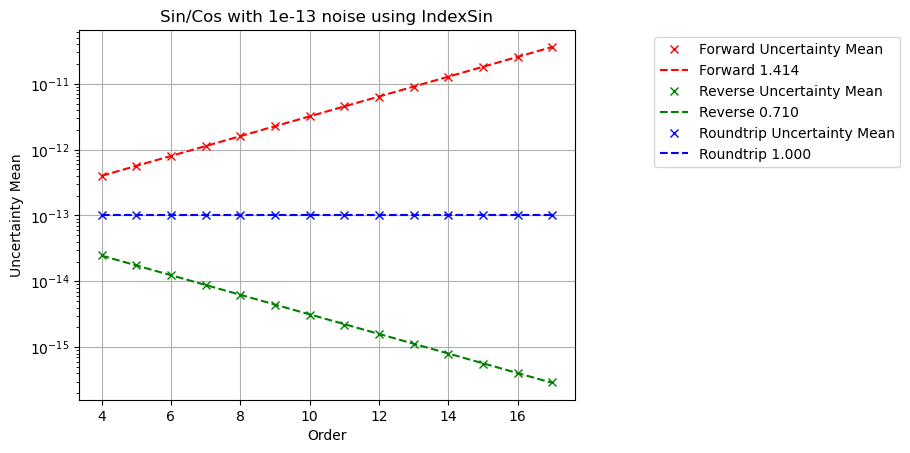

In [172]:
FitVsOrder('IndexSin', noise=1e-13)

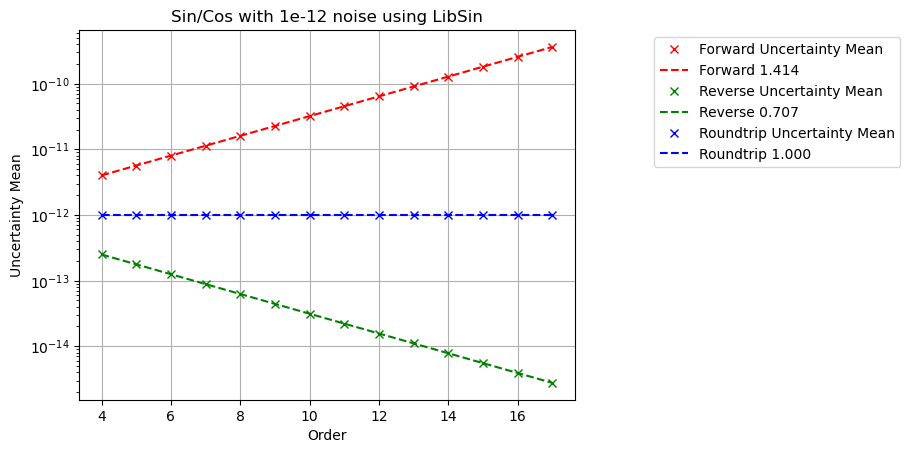

In [173]:
FitVsOrder('LibSin', noise=1e-12)

## Linear

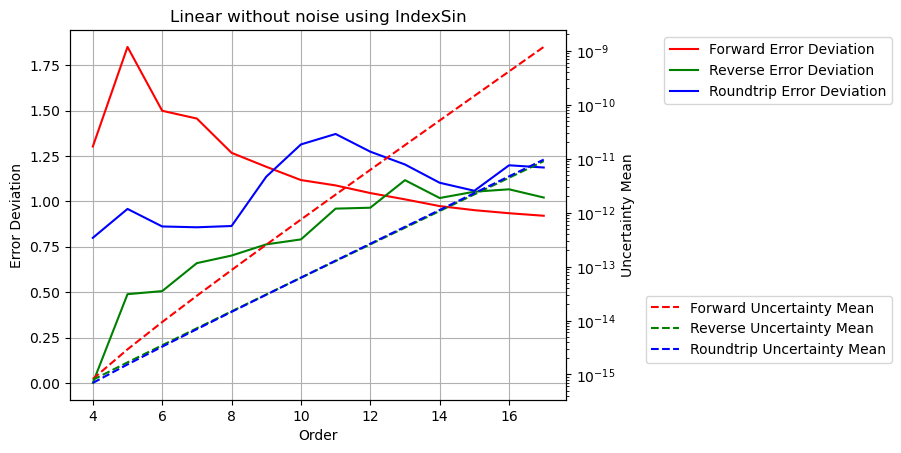

In [174]:
PlotVsOrder('IndexSin', 'Linear')

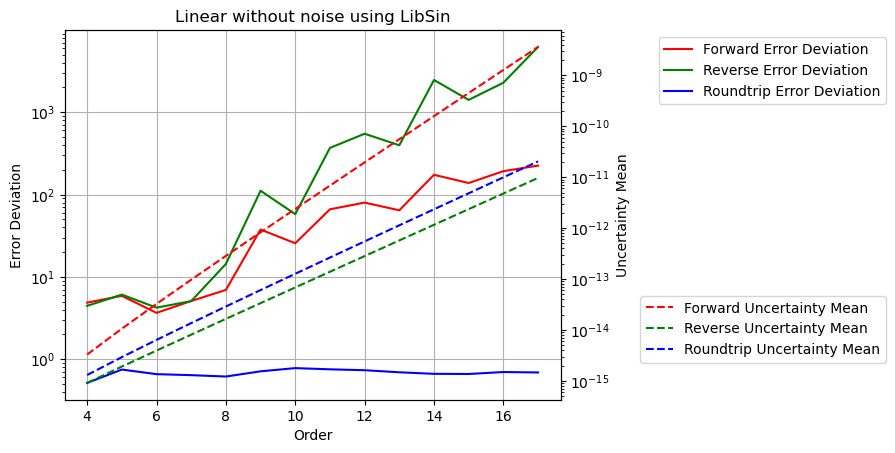

In [175]:
PlotVsOrder('LibSin', 'Linear', sLogy=(True, True))

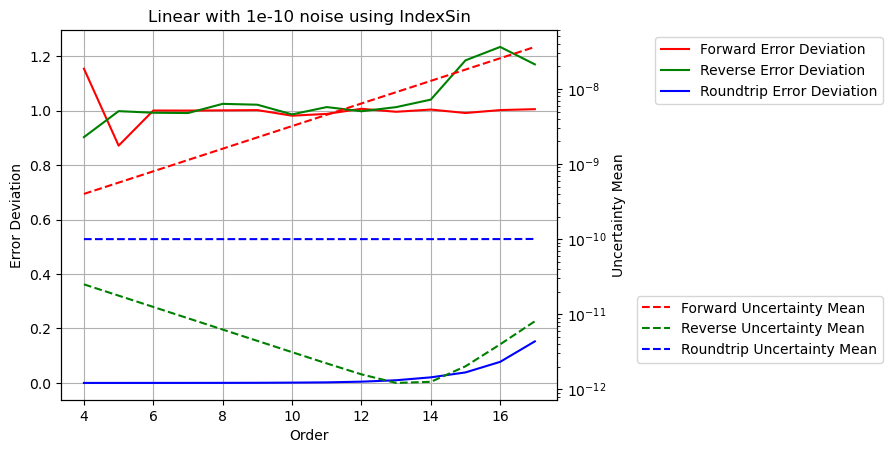

In [176]:
PlotVsOrder('IndexSin', 'Linear', noise=1e-10)

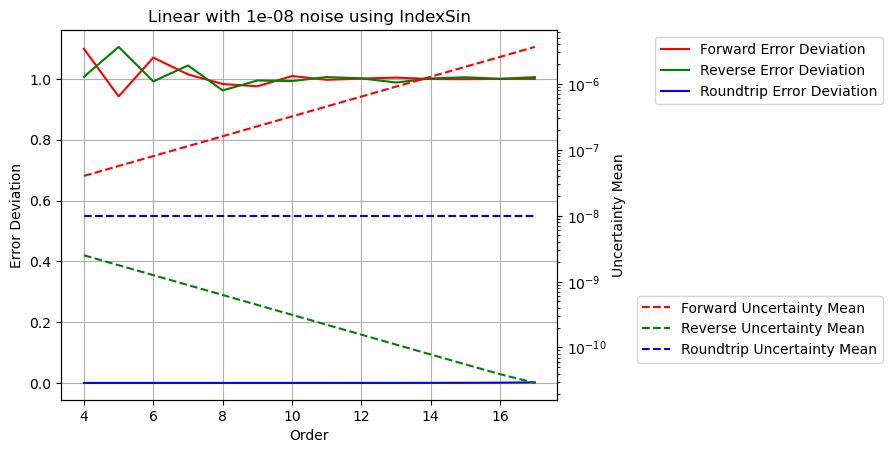

In [177]:
PlotVsOrder('IndexSin', 'Linear', noise=1e-8)

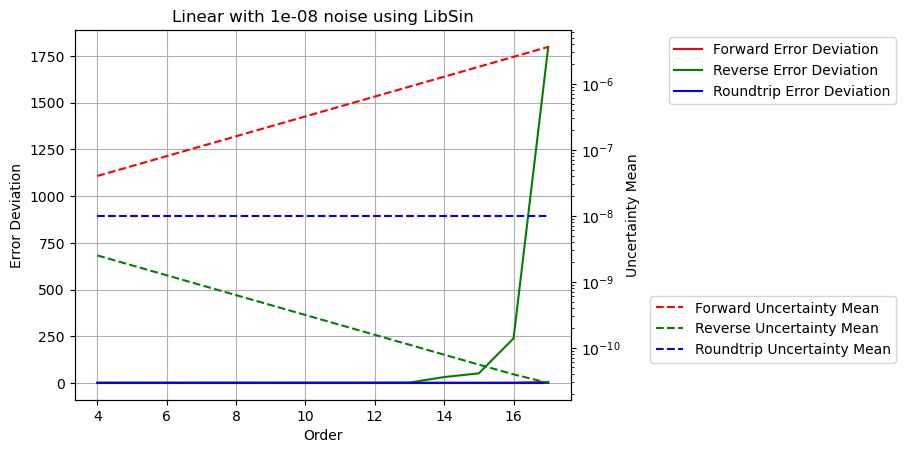

In [178]:
PlotVsOrder('LibSin', 'Linear', noise=1e-8)

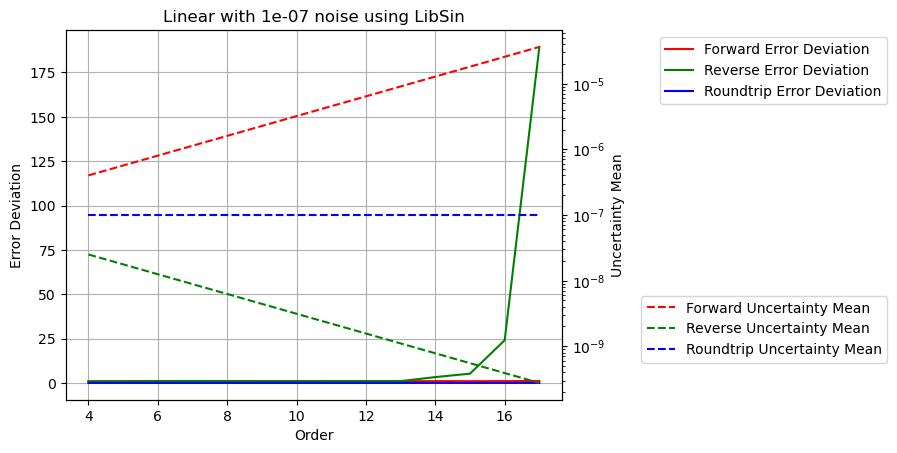

In [179]:
PlotVsOrder('LibSin', 'Linear', noise=1e-7)

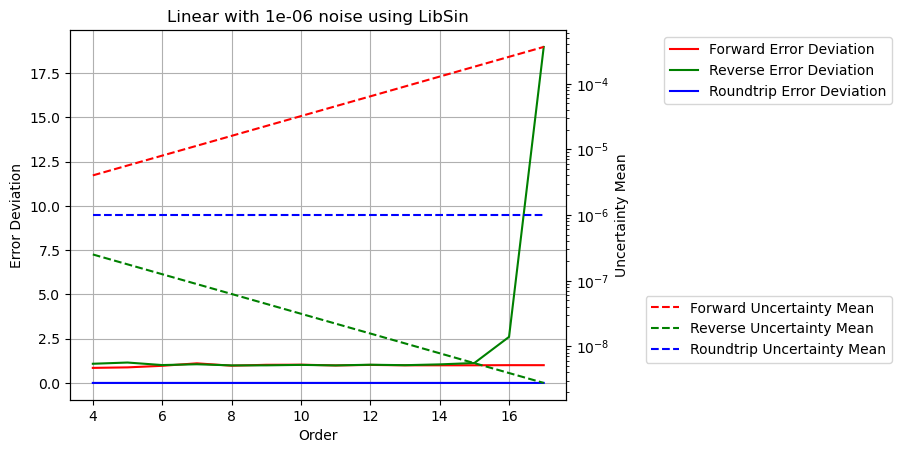

In [180]:
PlotVsOrder('LibSin', 'Linear', noise=1e-6)

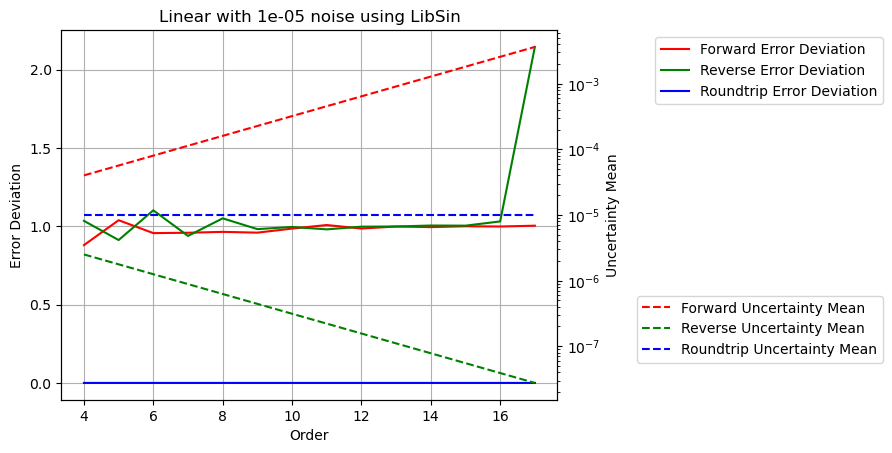

In [181]:
PlotVsOrder('LibSin', 'Linear', noise=1e-5)

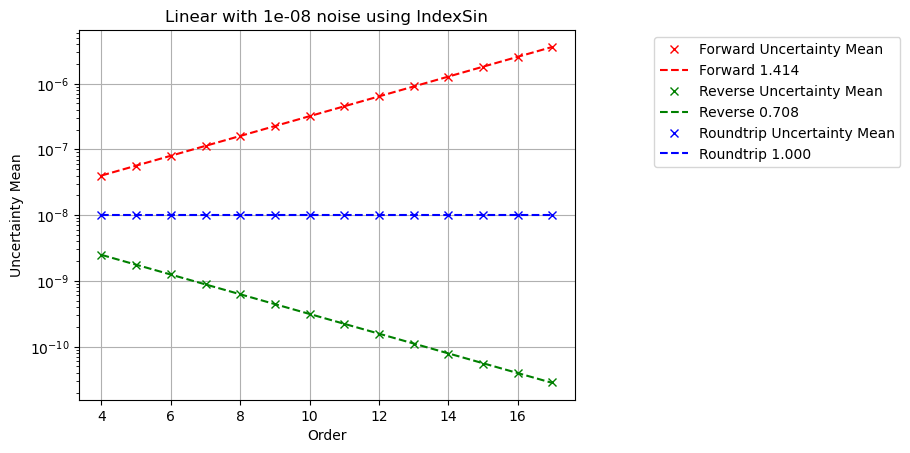

In [182]:
FitVsOrder('IndexSin', signal='Linear', noise=1e-8)

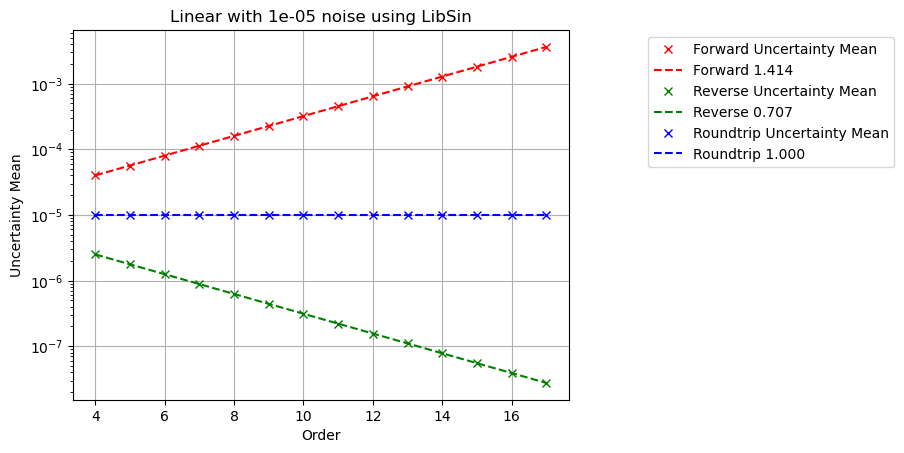

In [183]:
FitVsOrder('LibSin', signal='Linear', noise=1e-5)

# vs Noise

In [184]:
def PlotVsNoise( sinSource='IndexSin', signal='Aggr', freq=0, sTest=('Forward', 'Reverse', 'Roundtrip'), 
                 sValue=('Error Deviation', 'Uncertainty Mean'), 
                 sStyle=('-', '--'), sLogy=(False, True), sColor = ('r','g','b','y','c','r'), 
                 noiseType='Gaussian', order=ORDER ):
    
    fig, ax = plt.subplots()
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    ax.set_title(f'{signalName} vs noise using {sinSource}')
    ax.set_xlabel('Order')
    ax.set_xscale('log')
    ax.set_ylabel(sValue[0])
    if sLogy[0]:
        ax.set_yscale('log')
    plt.grid(True)
    
    ax2 = ax.twinx()
    ax2.set_ylabel(sValue[1])
    if sLogy[1]:
        ax2.set_yscale('log')
    
    for test, color in zip(sTest, sColor):
        dfPlot = df[(df['SinSource']==sinSource) & (df['Signal']==signal) & (df['Freq']==freq) & (df['Test']==test) &
                    (df['NoiseType']==noiseType) & (df['Noise']!=0) & (df['Order']==order)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['Noise'], dfPlot[sValue[0]], ''.join([color, sStyle[0]]), label=f'{test} {sValue[0]}')
        ax2.plot(dfPlot['Noise'], dfPlot[sValue[1]], ''.join([color, sStyle[1]]), label=f'{test} {sValue[1]}')

    ax.legend(bbox_to_anchor=(1.65, 1.0))
    ax2.legend(bbox_to_anchor=(1.65, 0.3))

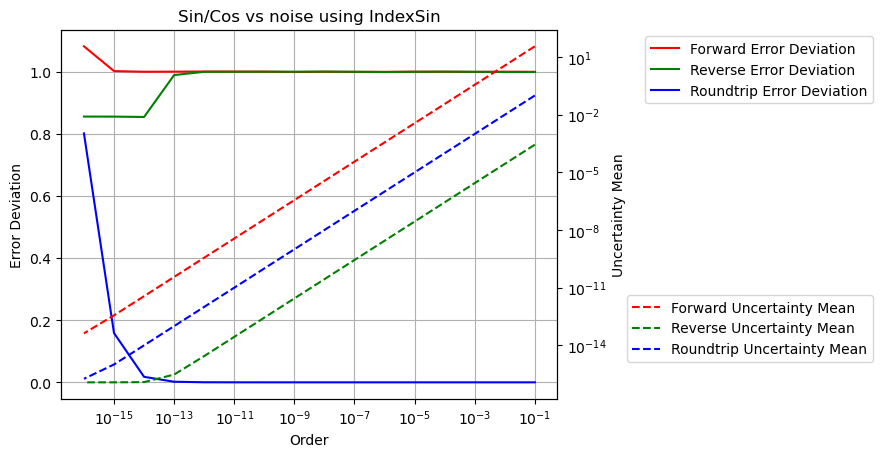

In [185]:
PlotVsNoise('IndexSin', 'Aggr')

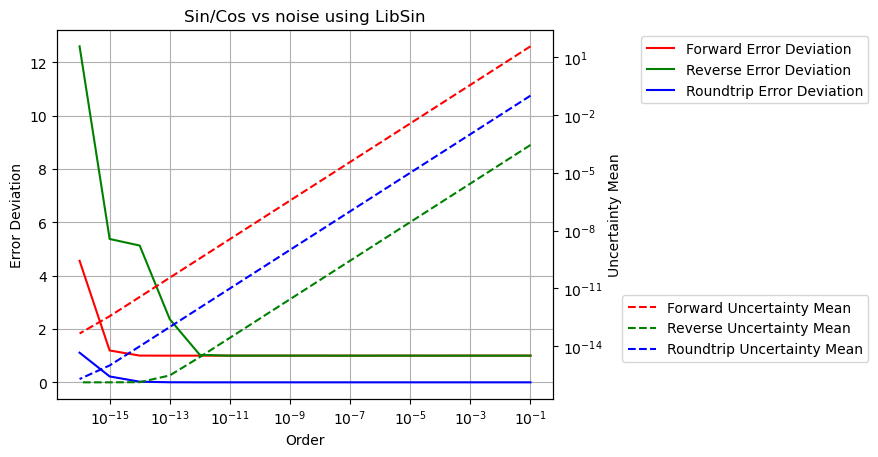

In [186]:
PlotVsNoise('LibSin', 'Aggr')

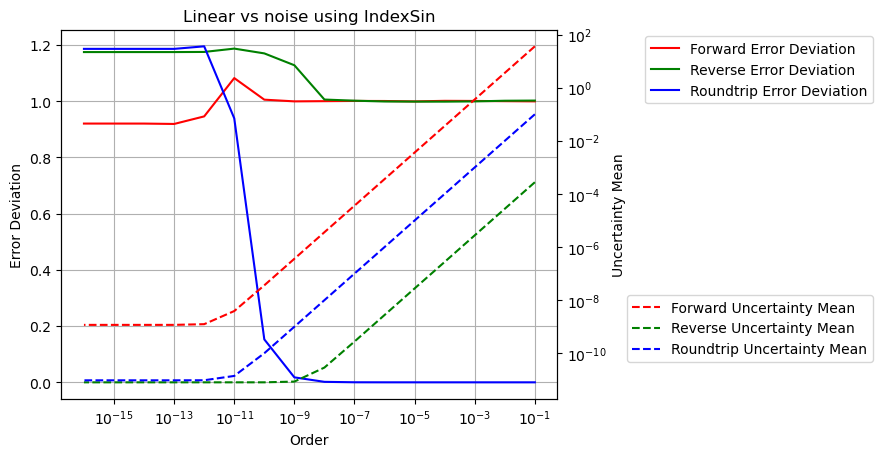

In [187]:
PlotVsNoise('IndexSin', 'Linear')

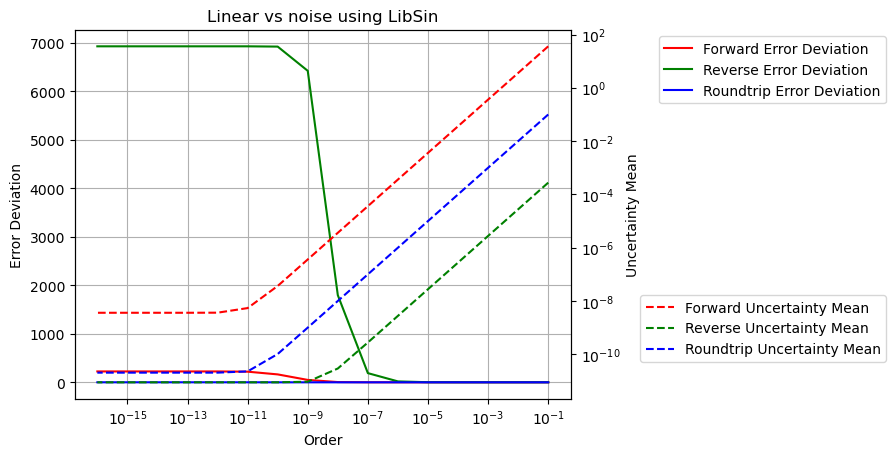

In [188]:
PlotVsNoise('LibSin', 'Linear')